In [58]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [59]:
# label: true = 0, fake = 1

In [60]:
experiment_name = "mistral_10k"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [61]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [62]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13232
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1653
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1653
    })
})

In [63]:
fake_train_dataset['train'][0]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We\'ve accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN\'s "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla',
 'label': 0}

In [64]:
print(fake_train_dataset['train'][0]['text'])

Former Vice President Dick Cheney on Sunday defended the Bush administration's economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We've accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN's "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla


In [65]:
fake_train_dataset['train'][2]

{'text': 'Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc',
 'label': 0}

In [66]:
print(fake_train_dataset['train'][2]["text"])

Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc


In [85]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_valid_df = pd.DataFrame(fake_train_dataset['valid'])
fake_train_df.head()

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,Space shuttle Discovery launched just before m...,1
4,When Eileen Mather lands in Mexico City on her...,0


In [68]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


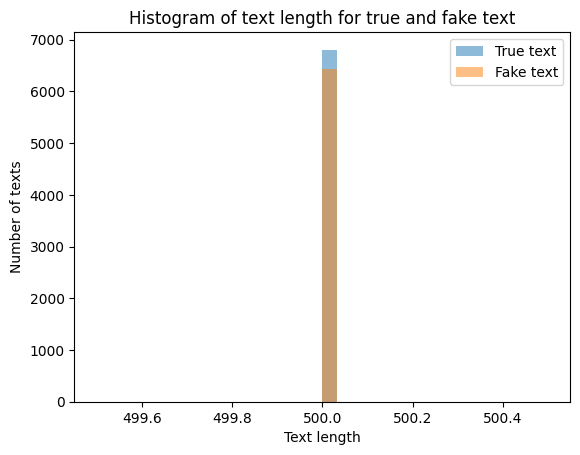

In [69]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [70]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [71]:
fake_train_df.describe()

,label
count,13232.000000
mean,0.485565
std,0.499810
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [72]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,6425.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [73]:
fake_train_df.head(20)

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,Space shuttle Discovery launched just before m...,1
4,When Eileen Mather lands in Mexico City on her...,0
5,Zimbabwean lawmakers on Monday narrowly voted ...,0
6,Zimbabwean lawmakers on Monday narrowly voted ...,1
7,Former detainees of Immigration and Customs En...,0
8,Former detainees of Immigration and Customs En...,1
9,A memorial cruise is scheduled to set sail 100...,0


In [74]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


In [75]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


0.0

In [76]:
test_text = "This a test text. It is not very long. It is just a test."

" ".join(test_text.split()[:10])

'This a test text. It is not very long. It'

# Test set

In [77]:
fake_train_dataset["train"][2:6]

{'text': ['Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc',
  'Space shuttle Discovery launched just before midnight Friday on a missing Malaysian jet has been widened, with the focus now on the southern Indian Ocean. The Australian Maritime Safety Authority said on Tuesday it had been notified of a “number of possible satellite sightings” of floating objects by a French satellite. “These objects are within the area being searched by the Australian Maritime Safety Authority, but they are not consistent with the two objects previously report

In [78]:
fake_test_df = pd.read_json("fake_true_dataset_mistral_10k_test.json")
fake_test_df.head()

,text,label
0,[A former astronaut who was accused of assault...,0
1,[A former astronaut who was accused of assault...,1
2,[Misdemeanor assault charges have been dropped...,0
3,[Misdemeanor assault charges have been dropped...,1
4,"[Six men, including a police officer, are faci...",0


In [79]:
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_test_df.head(10)

,text,label
0,A former astronaut who was accused of assaulti...,0
1,A former astronaut who was accused of assaulti...,1
2,Misdemeanor assault charges have been dropped ...,0
3,Misdemeanor assault charges have been dropped ...,1
4,"Six men, including a police officer, are facin...",0
5,"Six men, including a police officer, are facin...",1
6,British boxer Amir Khan has retained his WBA l...,0
7,British boxer Amir Khan has retained his WBA l...,1
8,"How are the elements of the charming, traditio...",0
9,"How are the elements of the charming, traditio...",1


In [80]:
fake_test_df["text"][2]

'Misdemeanor assault charges have been dropped against "24" star Kiefer Sutherland in a head-butting incident at a New York City nightclub, according to Alicia Maxey Greene, spokeswoman for the Manhattan District Attorney\'s office. Kiefer Sutherland turns himself in to the NYPD on May 7. Charges against him have been dropped. "We decided to drop the charge after a full investigation, including after speaking to a complaining witness, who was uncooperative," Greene told CNN Tuesday. The charges st'

In [81]:
fake_test_df["text"].unique().shape

(1653,)

In [82]:
#num_rows: 13377
fake_train_df["text"].unique().shape

(13232,)

In [86]:
# number of samples with label 0 and label 1 in the training dataset and the test dataset
print("Number of samples with label 0 in the training dataset:", fake_train_df[fake_train_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the training dataset:", fake_train_df[fake_train_df["label"] == 1].shape[0])

print("Number of samples with label 0 in the test dataset:", fake_test_df[fake_test_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the test dataset:", fake_test_df[fake_test_df["label"] == 1].shape[0])

print("Number of samples with label 0 in the validation dataset:", fake_valid_df[fake_valid_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the validation dataset:", fake_valid_df[fake_valid_df["label"] == 1].shape[0])

Number of samples with label 0 in the training dataset: 6807
Number of samples with label 1 in the training dataset: 6425
Number of samples with label 0 in the test dataset: 857
Number of samples with label 1 in the test dataset: 796
Number of samples with label 0 in the validation dataset: 858
Number of samples with label 1 in the validation dataset: 795
